<a href="https://colab.research.google.com/github/quintonmills/HousePricePredict/blob/main/HPFeatureEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Predicting Sale Price of Houses

The aim of the project is to build a machine learning model to predict the sale price of homes based on different explanatory variabeles describing aspects of residential houses



###Reproducibility: Setting the seed

To ensure repreoducibility it is important to set the seed

In [1]:
# to handle datasets
import pandas as pd
import numpy as np

#for plotting 
import matplotlib.pyplot as plt

#For the yeo-johnson transformation
import scipy.stats as stats

#to divide train and test set
from sklearn.model_selection import train_test_split

#Feature scaling
from sklearn.preprocessing import MinMaxScaler

#to save the trained scalar class
import joblib

#to visualise all the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
#load dataset
data = pd.read_csv('train.csv')

#rows and columns of the data
print(data.shape)

#visualise the dataset
data.head()

(1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

###Seperate dataset into train and test

Our engineering techniques will learn:


*   Mean
*   Mode
*   exponents for the yeo-johnson
*   category frequency
*   category to number mapping
from the train set





Seperating the data into train and test involves randomness, therefore we need to set the seed

In [3]:
#lets seperate into train and test set
x_train, x_test, y_train, y_test = train_test_split(
    data.drop(['Id', 'SalePrice'], axis = 1),  #Predictive variables
    data['SalePrice'], #target
    test_size = 0.1, #portion of dataset to allocate to test set
    random_state = 0, #were setting the seed
)
x_train.shape, x_test.shape

((1314, 79), (146, 79))

###Feature Engineering

in the following cells we will engineer the variabels of the house price dataset so that we tackle:
1. Missing values
2. Temporal variables
3. Non-Gaussian distributed variables
4. Categorical variables: remove rare labels
5. Categorical variables: convert strings to numbers
6. put the variables in a similar scale

###Target

We apply the logarithm

In [4]:
y_train = np.log(y_train)
y_test = np.log(y_test)

###Missing values

##Categorical variables

We will replaec missing values with the string "missing" in those varibles with a lot of missing data

alternatively we will replace missing data with the most frequent category in those variables that contain fewer observations without values

In [5]:
#Lets identify the categorical variables, we will captuer those in type object
cat_vars = [var for var in data.columns if data[var].dtype =="O"]

#MSSubClass is also categorical by definition

#Lets add MSSubClass to the list of categorical variables
cat_vars = cat_vars + ['MSSubClass']

#Cast all variables as categorical
x_train[cat_vars] = x_train[cat_vars].astype('O')
x_test[cat_vars] = x_test[cat_vars].astype('O')

#number of categorical variables
len(cat_vars)

44

In [6]:
# Make a list of the categorical variables that contain missing values

cat_vars_with_na = [
                    var for var in cat_vars
                    if x_train[var].isnull().sum() > 0
]
#Print percentage of missing values per variable
x_train[cat_vars_with_na].isnull().mean().sort_values(ascending = False)

PoolQC          0.995434
MiscFeature     0.961187
Alley           0.938356
Fence           0.814307
FireplaceQu     0.472603
GarageType      0.056317
GarageFinish    0.056317
GarageQual      0.056317
GarageCond      0.056317
BsmtExposure    0.025114
BsmtFinType2    0.025114
BsmtQual        0.024353
BsmtCond        0.024353
BsmtFinType1    0.024353
MasVnrType      0.004566
Electrical      0.000761
dtype: float64

In [7]:
#variable to impute with the string missing
with_string_missing = [
 var for var in cat_vars_with_na if x_train[var].isnull().mean() > 0.1]

#variables to impute with the most frequent category
with_frequent_category = [
                          var for var in cat_vars_with_na if x_train[var].isnull().mean() < 0.1]


In [8]:
with_string_missing

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [9]:
#replace missing values with new label: "Missing"

x_train[with_string_missing] = x_train[with_string_missing].fillna('Missing')
x_test[with_string_missing] = x_test[with_string_missing].fillna('Missing')


In [10]:
for var in with_frequent_category:

  #there can be more than 1 mode in a variable
  #We take the first one woth [0]
  mode = x_train[var].mode()[0]
  print(var, mode)

  x_train[var].fillna(mode, inplace = True)
  x_test[var].fillna(mode, inplace = True)
  

MasVnrType None
BsmtQual TA
BsmtCond TA
BsmtExposure No
BsmtFinType1 Unf
BsmtFinType2 Unf
Electrical SBrkr
GarageType Attchd
GarageFinish Unf
GarageQual TA
GarageCond TA


In [11]:
#Check that wee have no missing infomation in the engineered variables
x_train[cat_vars_with_na].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [12]:
#Check that test set does not contain null values in the engineered variables
[var for var in cat_vars_with_na if x_test[var].isnull().sum() > 0]


[]

###Numerical variables

To engineer missing values in numerical variables, we will:
* add a binary missing indicator variable
* and then replace the missing values in the original variable with the mean

In [13]:
#now lets identify the numerical variables
num_vars = [
            var for var in x_train.columns if var not in cat_vars and var != 'SalePrice']
            

In [14]:
#number of numerical variables
len(num_vars)

35

In [15]:
#Make a list with the numerical variables that contain missing values
vars_with_na = [
                var for var in num_vars
                if x_train[var].isnull().sum() > 0
]
#print percentage of missing values per variable
x_train[vars_with_na].isnull().mean()

LotFrontage    0.177321
MasVnrArea     0.004566
GarageYrBlt    0.056317
dtype: float64

In [16]:
#Replace missing values as we described above

for var in vars_with_na:

  #calculate the mean using the train set
  mean_val = x_train[var].mean()

  print(var, mean_val)

  #add binary missing indicator (in train and test)
  x_train[var + '_na'] = np.where(x_train[var].isnull(), 1, 0)
  x_test[var + '_na'] = np.where(x_test[var].isnull(), 1, 0)

  #replace missing values by the mean (in train and test)
  x_train[var].fillna(mean_val, inplace = True)
  x_test[var].fillna(mean_val, inplace = True)

#Check that we have no more missing values in the engineered variables
x_train[vars_with_na].isnull().sum()

LotFrontage 69.87974098057354
MasVnrArea 103.7974006116208
GarageYrBlt 1978.2959677419356


LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [17]:
#Check that test set does not contain null values in the engineered variables
[var for var in vars_with_na if x_test[var].isnull().sum() > 0]

[]

In [18]:
#Check the binary missing indicator variables

x_train[['LotFrontage_na', 'MasVnrArea_na', 'GarageYrBlt_na']].head()

LotFrontage_na  MasVnrArea_na  GarageYrBlt_na
930                0              0               0
656                0              0               0
45                 0              0               0
1348               1              0               0
55                 0              0               0

###Temporal variables

##Capture elapsed time

there are 4 variables that refer ti the years in which the house or garage were built or remodeled

we will capture the time elapsed between those varibles and the year in which the house was sold

In [19]:
def elapsed_years(df, var):
  df[var] = df['YrSold'] - df[var]
  return df

In [20]:
for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
  x_train = elapsed_years(x_train, var)
  x_test = elapsed_years(x_test, var)

In [21]:
#Now we drop YrSlold
x_train.drop(['YrSold'], axis = 1, inplace = True)
x_test.drop(['YrSold'], axis = 1, inplace = True)

In [22]:
###Numerical variable transformation

##Logarithmic transformation
the numerical variables are not normally distributed

we will transform the logarithm the positive numerical values in order to get a more gaussian-like distribution

In [23]:
for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:
  x_train[var] = np.log(x_train[var])
  x_test[var] = np.log(x_test[var])

In [24]:
#Check that test set does not contain null values on the engineered variables
[var for var in ["LotFrontage", "1stFlrSF", "GrLivArea"] if x_test[var].isnull().sum() > 0]

[]

In [25]:
#Same for train set
[var for var in ["LotFrontage", "1stFlrSF", "GrLivArea"] if x_train[var].isnull().sum() > 0]

[]

###Yeo-Johnson transformation

We will apply the Yeo-Johnson transformation to LotArea

In [26]:
#The yeo johnson transformation learns the best exponent to transform 
#it needs to learn it from the train set

x_train['LotArea'], param = stats.yeojohnson(x_train['LotArea'])

#and then apply the transformation to the test set with the same
#parameter: See who this time we pass param as argument to the yeojohnson
x_test['LotArea'] = stats.yeojohnson(x_test['LotArea'], lmbda = param)

print(param)

-12.55283001172003


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1478: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(trans.var(axis=0))
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:2371: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:1984: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:1985: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


In [27]:
#Check absence of na in the train set
[var for var in x_train.columns if x_test[var].isnull().sum() > 0]

[]

###Binarize skewed variables
there are a few variables that are very skewed, we would transform thise into binary variables


In [28]:
skewed = [
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'MiscVal'
]

for var in skewed:

  #map the variable values into 0 and 1
  x_train[var] = np.where(x_train[var] ==0, 0, 1)
  x_test[var] = np.where(x_test[var] == 0, 0, 1)

###Categorical variables

#Apply mappings

these are variables which values have an assigned order, related to quality. 

In [29]:
#Re-map strings to numbers, which determine quality

qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
             'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond',
            ]
for var in qual_vars:
  x_train[var] = x_train[var].map(qual_mappings)
  x_test[var] = x_test[var].map(qual_mappings)
  

In [30]:
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}

var = 'BsmtExposure'

x_train[var] = x_train[var].map(exposure_mappings)
x_test[var] = x_test[var].map(exposure_mappings)

In [34]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']

for var in finish_vars:
  x_train[var] = x_train[var].map(finish_mappings)
  x_test[var] = x_test[var].map(finish_mappings)

In [36]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'GarageFinish'

x_train[var] = x_train[var].map(garage_mappings)
x_test[var] = x_test[var].map(garage_mappings)

In [37]:
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'Fence'

x_train[var] = x_train[var].map(fence_mappings)
x_test[var] = x_test[var].map(fence_mappings)

In [38]:
#Check absence of na in the train set
[var for var in x_train.columns if x_train[var].isnull().sum() > 0]

[]

In [ ]:
###Remove Rare labels

For the remaining categorical variables, we will group those categories that are present in less than 1% of the observations. That is all values of categorical variables that are shaped by less than 1% of houses, will be replaced with the string "Rare"

In [39]:
#Capture all quality variables

qual_vars = qual_vars + finish_vars + ['BsmtExposure','GarageFinish','Fence']

#capture the remaining categorical variables (those that we didnt remap)

cat_others = [
              var for var in cat_vars if var not in qual_vars
]
len(cat_others)

30

In [43]:
def find_frequent_labels(df, var, rare_perc):

  #Function finds the labels that are shared by more than a certain % of the
  #houses in the dataset

  df = df.copy()

  tmp = df.groupby(var)[var].count() / len(df)

  return tmp[tmp > rare_perc].index

for var in cat_others:

  #find the frequent categories
  frequent_ls = find_frequent_labels(x_train, var, 0.01)

  print(var, frequent_ls)
  print()

  #Replace rare categories by the string "Rare"
  x_train[var] = np.where(x_train[var].isin(
      frequent_ls), x_train[var], 'Rare')
  
  x_test[var] = np.where(x_test[var].isin(frequent_ls), x_test[var], 'Rare')

MSZoning Index(['FV', 'RH', 'RL', 'RM'], dtype='object', name='MSZoning')

Street Index(['Pave'], dtype='object', name='Street')

Alley Index(['Grvl', 'Missing', 'Pave'], dtype='object', name='Alley')

LotShape Index(['IR1', 'IR2', 'Reg'], dtype='object', name='LotShape')

LandContour Index(['Bnk', 'HLS', 'Low', 'Lvl'], dtype='object', name='LandContour')

Utilities Index(['AllPub'], dtype='object', name='Utilities')

LotConfig Index(['Corner', 'CulDSac', 'FR2', 'Inside'], dtype='object', name='LotConfig')

LandSlope Index(['Gtl', 'Mod'], dtype='object', name='LandSlope')

Neighborhood Index(['Blmngtn', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor',
       'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NWAmes',
       'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW',
       'Somerst', 'StoneBr', 'Timber'],
      dtype='object', name='Neighborhood')

Condition1 Index(['Artery', 'Feedr', 'Norm', 'PosN', 'RRAn'], dtype='object', name='Condition1')

Con

###Encoding of categorical variables

next we need to transform the string of the categorical variables into numbers

we will do it so that we capture the monotonic relationship between the label and the target''

In [66]:
#This function will assign discrete values to the string of the variables
#So that the smaller value corresponds to the category that shows the
#mean house sale price

def replace_categories(train, test, y_train, var, target):
  tmp = pd.concat([x_train, y_train], axis = 1)

  #order the categories in a variable from that with the lowest house sale price
  #to that with the highest
  ordered_labels = tmp.groupby([var])[target].mean().sort_values().index

  #Create a dictionary of orderred categories to integer values
  ordinal_label = {k: i for i, k in enumerate(ordered_labels, 0)}
  print(var, ordinal_label)
  print()

  #use the dictionary to replace the categorical strings bu integers
  train[var] = train[var].map(ordinal_label)
  test[var] = test[var].map(ordinal_label)


In [67]:
for var in cat_others:
    replace_categories(x_train, x_test, y_train, var, 'SalePrice')

MSZoning {'Rare': 0, 'RM': 1, 'RH': 2, 'RL': 3, 'FV': 4}

Street {'Rare': 0, 'Pave': 1}

Alley {'Grvl': 0, 'Pave': 1, 'Missing': 2}

LotShape {'Reg': 0, 'IR1': 1, 'Rare': 2, 'IR2': 3}

LandContour {'Bnk': 0, 'Lvl': 1, 'Low': 2, 'HLS': 3}

Utilities {'Rare': 0, 'AllPub': 1}

LotConfig {'Inside': 0, 'FR2': 1, 'Corner': 2, 'Rare': 3, 'CulDSac': 4}

LandSlope {'Gtl': 0, 'Mod': 1, 'Rare': 2}

Neighborhood {'IDOTRR': 0, 'MeadowV': 1, 'BrDale': 2, 'Edwards': 3, 'BrkSide': 4, 'OldTown': 5, 'Sawyer': 6, 'SWISU': 7, 'NAmes': 8, 'Mitchel': 9, 'SawyerW': 10, 'Rare': 11, 'NWAmes': 12, 'Gilbert': 13, 'Blmngtn': 14, 'CollgCr': 15, 'Crawfor': 16, 'ClearCr': 17, 'Somerst': 18, 'Timber': 19, 'StoneBr': 20, 'NridgHt': 21, 'NoRidge': 22}

Condition1 {'Artery': 0, 'Feedr': 1, 'Norm': 2, 'RRAn': 3, 'Rare': 4, 'PosN': 5}

Condition2 {'Rare': 0, 'Norm': 1}

BldgType {'2fmCon': 0, 'Duplex': 1, 'Twnhs': 2, '1Fam': 3, 'TwnhsE': 4}

HouseStyle {'SFoyer': 0, '1.5Fin': 1, 'Rare': 2, '1Story': 3, 'SLvl': 4, '2Story'

In [68]:
# check absence of na in the train set
[var for var in x_train.columns if x_train[var].isnull().sum() > 0]

[]

In [69]:
# check absence of na in the test set
[var for var in x_test.columns if x_test[var].isnull().sum() > 0]

[]

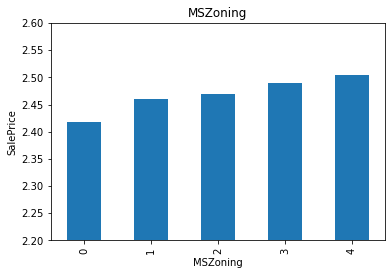

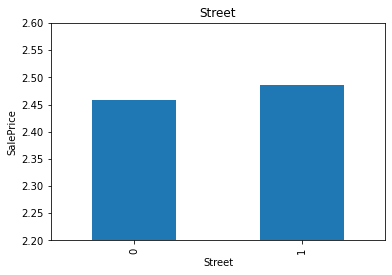

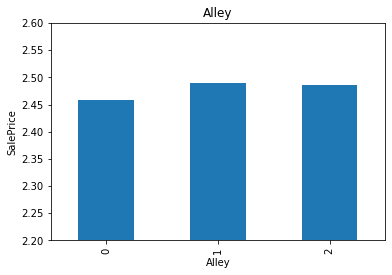

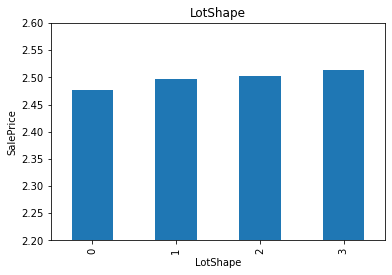

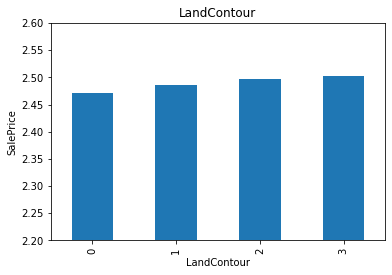

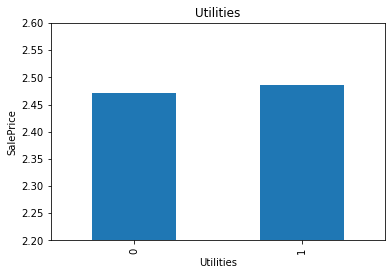

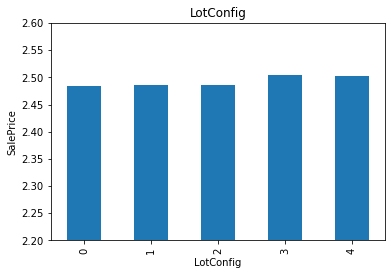

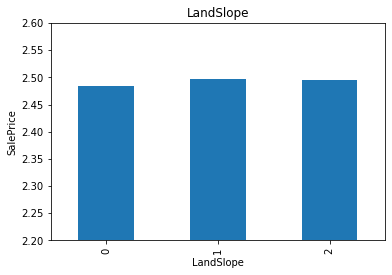

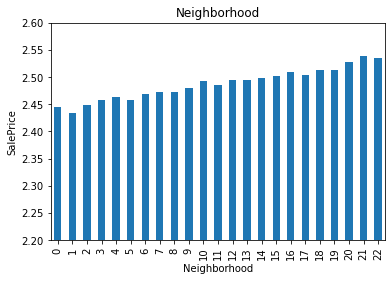

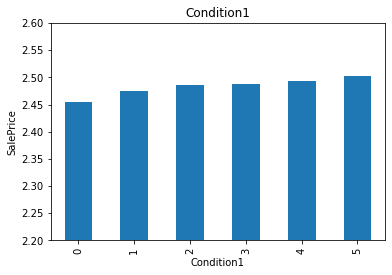

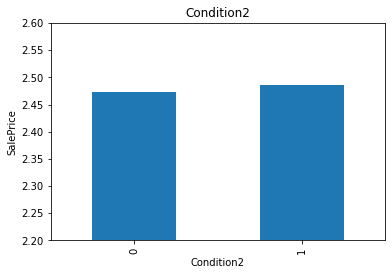

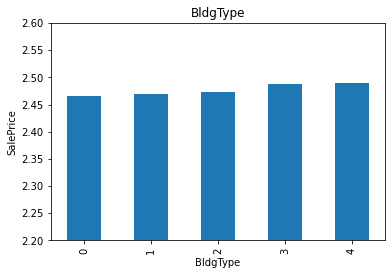

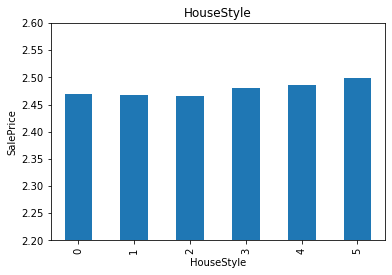

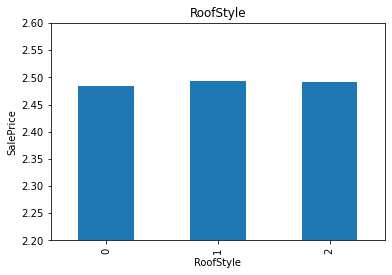

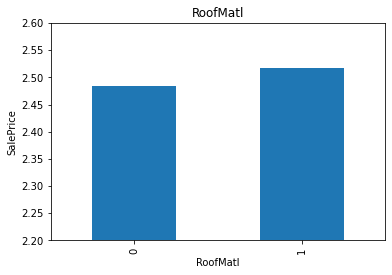

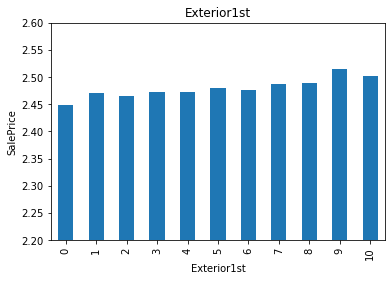

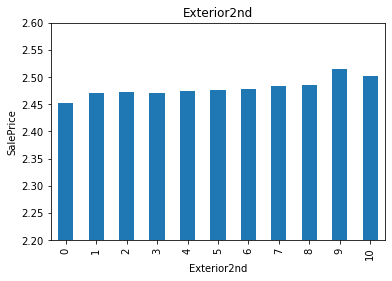

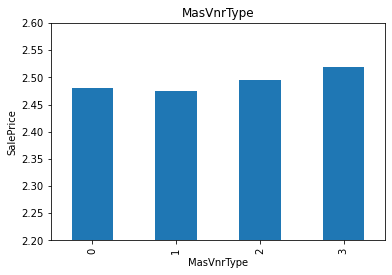

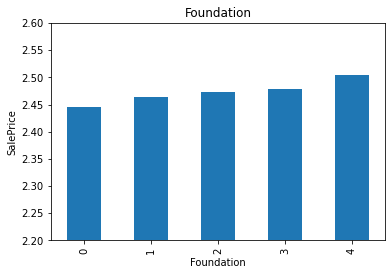

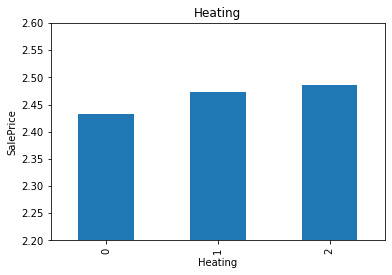

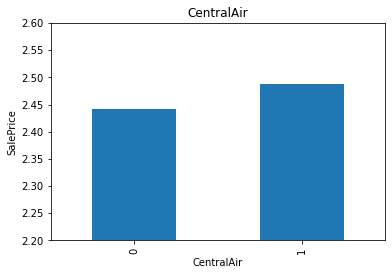

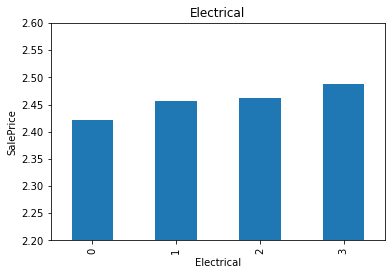

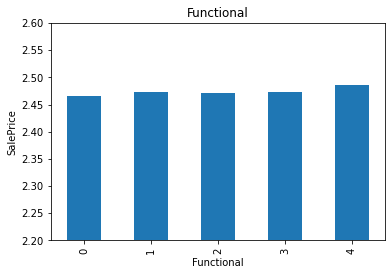

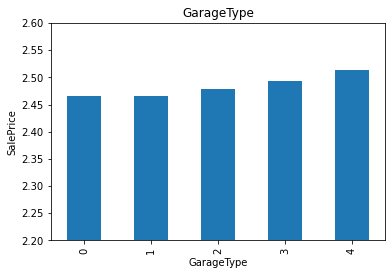

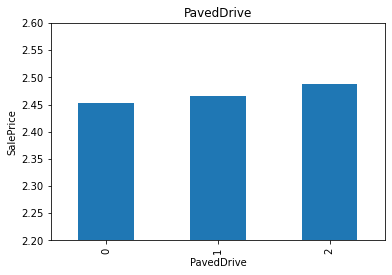

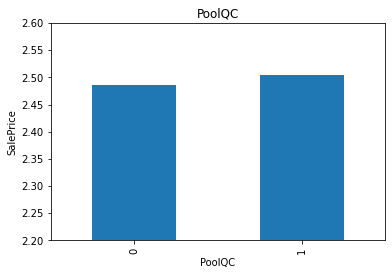

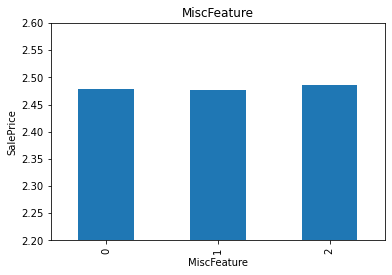

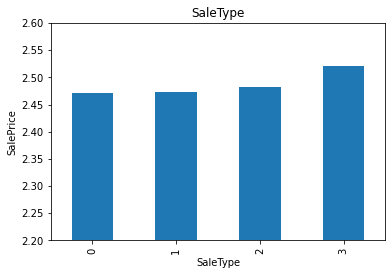

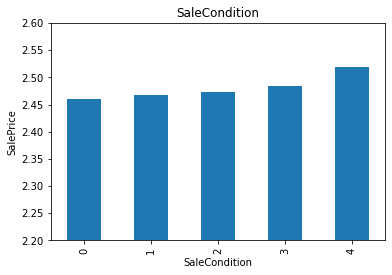

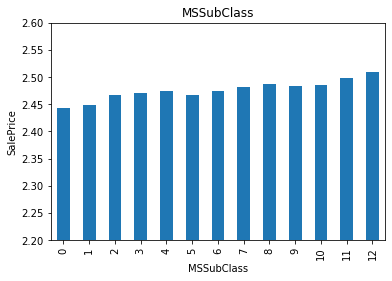

In [70]:
#Monotonic relationship between labels and target

def analyse_vars(train, y_train, var):

  #function plots median house sale price per encoded category

    tmp = pd.concat([x_train, np.log(y_train)], axis=1)
    
    tmp.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.ylim(2.2, 2.6)
    plt.ylabel('SalePrice')
    plt.show()
    
for var in cat_others:
    analyse_vars(x_train, y_train, var)

The monotonic relationship is particularly clear for the variables MSZoning and Neighborhood. The higher the integer that now represents that category, the higher the mean house sale price

###Feature Scaling

For use in linear models, features need to be either scaled. We will scale features to the minimum and maximum values

In [71]:
# create scaler
scaler = MinMaxScaler()

#  fit  the scaler to the train set
scaler.fit(x_train) 

#Transform the train and test set

#Sklearn returns numpy arrays, so we wrap the array with a pandas dataframe
x_train = pd.DataFrame(
    scaler.transform(x_train),
    columns = x_train.columns
)
x_test = pd.DataFrame(
    scaler.transform(x_test),
    columns = x_train.columns
)

In [72]:
x_train.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0    0.750000      0.75     0.461171      0.0     1.0    1.0  0.333333   
1    0.750000      0.75     0.456066      0.0     1.0    1.0  0.333333   
2    0.916667      0.75     0.394699      0.0     1.0    1.0  0.000000   
3    0.750000      0.75     0.445002      0.0     1.0    1.0  0.666667   
4    0.750000      0.75     0.577658      0.0     1.0    1.0  0.333333   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0     1.000000        1.0        0.0        0.0      0.863636         0.4   
1     0.333333        1.0        0.0        0.0      0.363636         0.4   
2     0.333333        1.0        0.0        0.0      0.954545         0.4   
3     0.666667        1.0        0.0        0.0      0.454545         0.4   
4     0.333333        1.0        0.0        0.0      0.363636         0.4   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0         1.0      0.75         0.6     0.777778         0.50   0.014706   
1         1.0      0.75         0.6     0.444444         0.75   0.360294   
2         1.0      1.00         0.6     0.888889         0.50   0.036765   
3         1.0      0.75         0.6     0.666667         0.50   0.066176   
4         1.0      0.75         0.6     0.555556         0.50   0.323529   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0      0.049180        0.0       0.0          1.0          1.0    0.333333   
1      0.049180        0.0       0.0          0.6          0.6    0.666667   
2      0.098361        1.0       0.0          0.3          0.2    0.666667   
3      0.163934        0.0       0.0          1.0          1.0    0.333333   
4      0.737705        0.0       0.0          0.6          0.7    0.666667   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0     0.00000   0.666667        0.5         1.0  0.666667  0.666667   
1     0.03375   0.666667        0.5         0.5  0.333333  0.666667   
2     0.25750   1.000000        0.5         1.0  1.000000  0.666667   
3     0.00000   0.666667        0.5         1.0  0.666667  0.666667   
4     0.17000   0.333333        0.5         0.5  0.333333  0.666667   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0      0.666667           1.0    0.002835           0.0         0.0   
1      0.000000           0.8    0.142807           0.0         0.0   
2      0.000000           1.0    0.080794           0.0         0.0   
3      1.000000           1.0    0.255670           0.0         0.0   
4      0.000000           0.6    0.086818           0.0         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0   0.673479     0.239935      1.0       1.00         1.0         1.0   
1   0.114724     0.172340      1.0       1.00         1.0         1.0   
2   0.601951     0.286743      1.0       1.00         1.0         1.0   
3   0.018114     0.242553      1.0       1.00         1.0         1.0   
4   0.434278     0.233224      1.0       0.75         1.0         1.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  0.559760       0.0           0.0   0.523250      0.000000           0.0   
1  0.434539       0.0           0.0   0.406196      0.333333           0.0   
2  0.627205       0.0           0.0   0.586296      0.333333           0.0   
3  0.566920       0.0           0.0   0.529943      0.333333           0.0   
4  0.549026       0.0           0.0   0.513216      0.000000           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0  0.666667       0.0         0.375      0.333333     0.666667      0.416667   
1  0.333333       0.5         0.375      0.333333     0.666667      0.250000   
2  0.666667       0.0         0.250      0.333333     1.000000      0.333333   
3  0.666667       0.0         0.375      0.333333     0.666667      0.250000   
4  0.66

In [73]:
#Lets now save the train and test sets for the next notebook
x_train.to_csv('xtrain.csv', index=False)
x_test.to_csv('xtest.csv', index=False)

y_train.to_csv('ytrain.csv', index=False)
y_test.to_csv('ytest.csv', index=False)

In [74]:
#Lets save the scaler

joblib.dump(scaler, 'minmax_scaler.joblib')

['minmax_scaler.joblib']